<a href="https://colab.research.google.com/github/Xavier-ML/Machine-Learning/blob/main/Panorama_de_la_vivienda_en_Melbourne_analisis_KMeans_para_la_toma_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama de la vivienda en Melbourne analisis KMeans para la toma de decisión

by Javier Quispe Tenorio

In [1]:
# Para establecer una carpeta de trabajo desde mi laptop

from google.colab import files
uploaded = files.upload()

Saving melb_data.csv to melb_data (2).csv


los datos fueron extraìdos de

https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data?select=melb_data.csv

In [2]:
pwd

'/content'

In [3]:
# cargar mi dataset

import pandas as pd

df = pd.read_csv("melb_data.csv")


In [4]:
# Imprime los nombres de las columnas del DataFrame.
print(df.columns)


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [5]:
# tamaño de datos filas y columnas de df

df.shape


(13580, 21)

In [6]:
# tipos de variables

df.dtypes


,0
Suburb,object
Address,object
Rooms,int64
Type,object
Price,float64
Method,object
SellerG,object
Date,object
Distance,float64
Postcode,float64


In [7]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
# Como ver si hay datos perdidos en cada variable de df

df.isnull().sum()


,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [9]:
# mostrar los diferentes datos guardados en as variables BuildingArea, YearBuilt, CouncilArea
# analizar los datos donde se encuentra los datos faltantes
for column in ["BuildingArea", "YearBuilt", "CouncilArea"]:
  print(f'{column}: {df[column].unique()[:20]}')

BuildingArea: [ nan  79. 150. 142. 210. 107.  75. 190.  94.  97. 110. 105.  73. 135.
  27.  60.  85. 174.  50. 128.]
YearBuilt: [  nan 1900. 2014. 1910. 1890. 2005. 2009. 1880. 1985. 2010. 1970. 2013.
 2012. 1920. 1950. 1998. 1930. 2016. 1965. 1980.]
CouncilArea: ['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse'
 'Maribyrnong' 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne'
 'Kingston' 'Brimbank' 'Hume' nan]


In [10]:
# imputacion de datos de datos perdidos de df

from sklearn.impute import SimpleImputer

# Inicializa el imputador con la estrategia 'most_frequent' (la más frecuente)
imputer = SimpleImputer(strategy='most_frequent')

# Ajusta el imputador a las columnas con datos faltantes
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verifica si hay valores faltantes después de la imputación
print(df_imputed.isnull().sum())


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [11]:
# Genera una lista de todas las variables en df
variables = list(df.columns)
print(variables)


['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [12]:
variables

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [13]:
df_imputed.describe()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580,13580,13580.0,13580,13580,13580,13580.0,13580.0,...,13580.0,13580.0,13580.0,13580.0,13580.0,13580,13580.0000,13580.0000,13580,13580.0
unique,314,13378,9,3,2204.0,5,268,58,202.0,198.0,...,9.0,11.0,1448.0,602.0,144.0,33,6503.0000,7063.0000,8,311.0
top,Reservoir,36 Aberfeldie St,3,h,1100000.0,S,Nelson,27/05/2017,11.2,3073.0,...,1.0,2.0,0.0,120.0,1970.0,Moreland,-37.8361,144.9966,Southern Metropolitan,21650.0
freq,359,3,5881,9449,113.0,9022,1565,473,739.0,359.0,...,7512.0,5653.0,1939.0,6564.0,6241.0,2532,21.0000,17.0000,4695,359.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

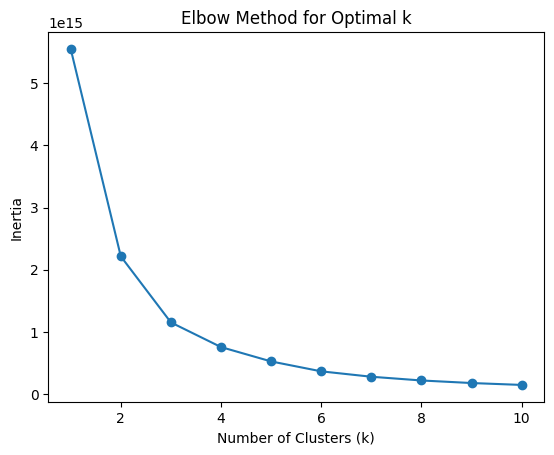

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-15-5de6c8dcb468>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_distance_df['Cluster'] = kmeans.fit_predict(price_distance_df)


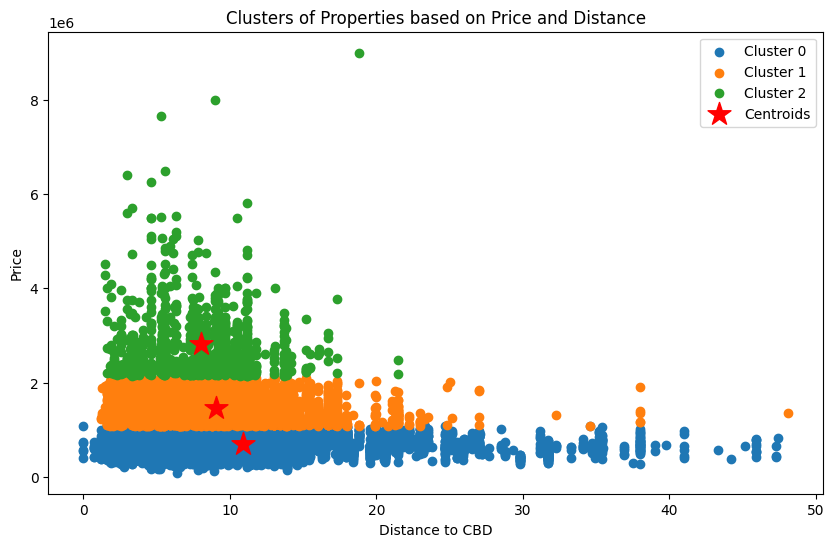

In [15]:
# Cluster entre las variables de precio y distancia al centro CBD agrgar una leyenda de los colores

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a new DataFrame with 'Price' and 'Distance'
price_distance_df = df_imputed[['Price', 'Distance']]

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(price_distance_df)
  inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
price_distance_df['Cluster'] = kmeans.fit_predict(price_distance_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
  cluster_data = price_distance_df[price_distance_df['Cluster'] == i]
  plt.scatter(cluster_data['Distance'], cluster_data['Price'], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Distance to CBD')
plt.ylabel('Price')
plt.title('Clusters of Properties based on Price and Distance')
plt.legend()
plt.show()


In [18]:
# Apartir de dataset cluster_data agregarlos nombres de las direcciones y el número de habitaciones a este dataset se va a llamar cluster_df

# Assuming 'Address' and 'Rooms' are columns in your original DataFrame (df_imputed)

# Create a new DataFrame with 'Address', 'Rooms', 'Price', and 'Distance'
cluster_df = df_imputed[['Address', 'Rooms', 'Price', 'Distance']]

# Apply K-means clustering (using the same model as before)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df[['Price', 'Distance']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-18-37ff5e70f238>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.fit_predict(cluster_df[['Price', 'Distance']])


In [19]:
cluster_df.head(10)

,Address,Rooms,Price,Distance,Cluster
0,85 Turner St,2,1480000.0,2.5,1
1,25 Bloomburg St,2,1035000.0,2.5,0
2,5 Charles St,3,1465000.0,2.5,1
3,40 Federation La,3,850000.0,2.5,0
4,55a Park St,4,1600000.0,2.5,1
5,129 Charles St,2,941000.0,2.5,0
6,124 Yarra St,3,1876000.0,2.5,1
7,98 Charles St,2,1636000.0,2.5,1
8,6/241 Nicholson St,1,300000.0,2.5,0
9,10 Valiant St,2,1097000.0,2.5,1


In [20]:
# DataFrame cluster_df: graficar precio price, dirección y  la distancia  del dataset cluster_df  con 5000 filas

# Sample 5000 rows from the dataframe.
sample_df = cluster_df.sample(n=5000)

# Create a scatter plot of Price vs Distance, colored by Cluster.
import altair as alt
alt.Chart(sample_df).mark_circle().encode(
    x='Price',
    y='Distance',
    color='Cluster:N'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [21]:
#Ordenar el dataset cluster_df por distancia y menor precio

cluster_df_sorted = cluster_df.sort_values(by=['Distance', 'Price'], ascending=[True, True])
print(cluster_df_sorted)

                     Address Rooms      Price Distance  Cluster
11428   806/22 Coromandel Pl     2   387000.0      0.0        0
12074     713/118 Russell St     2   540000.0      0.0        0
12073     709/87 Franklin St     2   565000.0      0.0        0
10393  1814/250 Elizabeth St     2   720000.0      0.0        0
9620          19/300 King St     2   740000.0      0.0        0
...                      ...   ...        ...      ...      ...
10003       69 Willowtree Dr     4   410500.0     47.3        0
11470           4 Toorang Ct     4   435000.0     47.3        0
11763            1 Loxton Wy     4   643500.0     47.3        0
10033         53 Bluegum Cct     4   817000.0     47.4        0
13245         71 Hamilton Rd     5  1355000.0     48.1        1

[13580 rows x 5 columns]


In [22]:
# Ordenar las 10 posibles compras a bajo precio y menor distancia del dataset cluster_df_sorted

# Selecciona las 10 propiedades con menor distancia y menor precio
top_10_compras = cluster_df_sorted.head(10)

# Imprime las 10 posibles compras a bajo precio y menor distancia
print(top_10_compras[['Address', 'Price', 'Distance', 'Cluster']])


                     Address      Price Distance  Cluster
11428   806/22 Coromandel Pl   387000.0      0.0        0
12074     713/118 Russell St   540000.0      0.0        0
12073     709/87 Franklin St   565000.0      0.0        0
10393  1814/250 Elizabeth St   720000.0      0.0        0
9620          19/300 King St   740000.0      0.0        0
10739        61/299 Queen St  1075000.0      0.0        0
9331        512/22 Dorcas St   422000.0      0.7        0
9729        406/152 Sturt St   422500.0      0.7        0
9332     2605/63 Whiteman St   590000.0      0.7        0
10511          2/96 Dodds St   600000.0      0.7        0


las 10 posibles compras de viviendas en Melbourne cerca de C.B.D

In [25]:
# desde cluster_df_with_room ordenar menor distancia, menor precio y que tenga dos habitaciones

# Filtra las propiedades con dos habitaciones
cluster_df_two_rooms = cluster_df[cluster_df['Rooms'] == 2]

# Ordena por distancia y precio (ascendente)
cluster_df_sorted = cluster_df_two_rooms.sort_values(by=['Distance', 'Price'], ascending=[True, True])

# Muestra las 10 primeras propiedades
print(cluster_df_sorted[['Address', 'Price', 'Distance', 'Cluster', 'Rooms']].head(10))


                     Address      Price Distance  Cluster Rooms
11428   806/22 Coromandel Pl   387000.0      0.0        0     2
12074     713/118 Russell St   540000.0      0.0        0     2
12073     709/87 Franklin St   565000.0      0.0        0     2
10393  1814/250 Elizabeth St   720000.0      0.0        0     2
9620          19/300 King St   740000.0      0.0        0     2
10739        61/299 Queen St  1075000.0      0.0        0     2
9332     2605/63 Whiteman St   590000.0      0.7        0     2
10511          2/96 Dodds St   600000.0      0.7        0     2
10512        28/161 Sturt St   600000.0      0.7        0     2
11201         17/30 Miles St   625000.0      0.7        0     2


las 10 primeras opciones cerca del centro con 2 habitaciones cerca de C.B.D.